voir toutes les indications https://github.com/jabrell/pyeutl/tree/main

Code à lancer:
`i, n 
pip install git+https://github.com/jabrell/pyeutl.git`

Installer postgresSQL version 16

In [2]:
import pandas as pd

2009 année 0
banking 2009 = quotas alloués gratuitement - émissions vérifiées/ quotas restitués + quotas acquis aux enchères (marché primaire) + montants nets des actions sur le marchés secondaire 

Grouper par secteur

Test 1 secteur du ciment, id = 23.51

In [1]:
from pyeutl.orm import DataAccessLayer

connectionSettings = dict(
    user="postgres", 
    host="localhost", 
    db="eutl2024", 
    passw="password",
    port=5432
)



- Rajouter dans PATH des variables système le lien vers POSTGRES:
`C:\Program Files\PostgreSQL\17\bin`
- Puis lancer cette commande dans le terminal pour s'assurer du bon fonctionnement des credentials donnés ci-dessus et de POSTGRES:
`psql -h localhost -p 5432 -U postgres -W`

- Si le code d'en dessous ne fonctionne toujours pas, créer une base de données appelée EU ETL
en relançant:
``psql -h localhost -p 5432 -U postgres -W``

puis en entrant le mdp: password et puis en compilant:
postgres=#`CREATE DATABASE eutl2024`;

-> j'ai appuyé sur echap lors du pop up qui demande si il peut supprimer les tables existantes (mais peut etre inutile vue qu'il n'y a pas de tables dans eutl2024)



In [2]:
#création de la base de données
dal = DataAccessLayer(**connectionSettings)
#creation de la base


In [3]:
dal.create_database()

No source file provided. Download data from euets.info
#### Tables still in database ####
---- Insert lookup tables
---- Insert offset projects
---- Insert installations
---- Insert compliance data
---- Insert surrendering data
---- Insert account holders
---- Insert accounts
---- Insert transactions


In [20]:
from pyeutl.orm import Installation       # EUETS Installation object
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

session = dal.session

In [21]:
id_inst = "PL_1"
inst = session.get(Installation, id_inst)
print(inst.id + ": " + inst.name)
print(inst.address)
print("Activity:", inst.activity)

PL_1: PGE GiEK S.A. Oddział Elektrownia Bełchatów
Wola Grzymalina 3
97-406 Bełchatów
Poland
Activity: Combustion of fuels


In [24]:
inst.compliance
df_compliance = inst.get_compliance().drop("reportedInSystem_id", axis=1)
df_compliance[["year", "allocatedTotal", "verified", "surrendered"]].set_index("year").div(1000000)

,allocatedTotal,verified,surrendered
year,,,
2005,30.794300,31.970055,31.970055
2006,30.794300,30.083123,30.083123
2007,30.794300,28.322323,28.322323
2008,26.937155,30.862792,30.862792
2009,26.937155,29.473072,29.473072
2010,26.937155,29.659590,29.659590
2011,26.937155,32.823146,32.823146
2012,31.749901,35.193844,35.193844
2013,16.816401,37.178165,37.178165


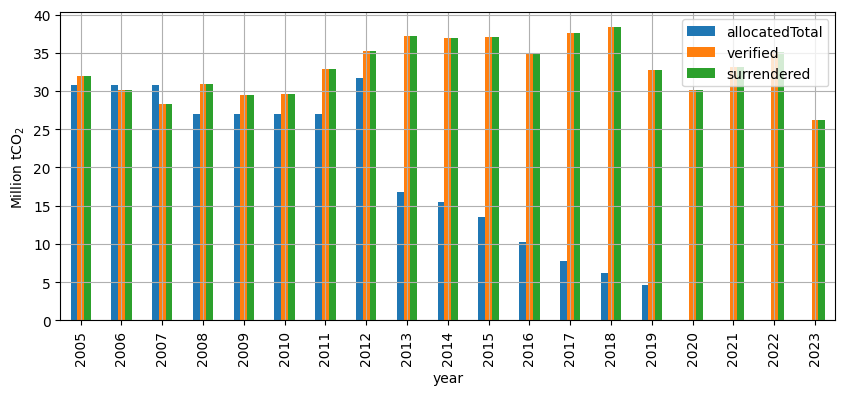

In [25]:
ax = (
    df_compliance
    [["year", "allocatedTotal", "verified", "surrendered"]]
    .query("year < 2024")
    .set_index("year").div(1000000)
    .plot(kind="bar", figsize=(10,4), ylabel="Million tCO$_2$", grid=True)
)

In [53]:
from pyeutl.orm import NaceCode, Country

registry = session.get(NaceCode,None)


C:\Users\zoero\AppData\Local\Temp\ipykernel_8836\1910480723.py:3: SAWarning: fully NULL primary key identity cannot load any object.  This condition may raise an error in a future release.
  registry = session.get(NaceCode,None)


InternalError: (psycopg2.errors.InFailedSqlTransaction) ERREUR:  la transaction est annulée, les commandes sont ignorées jusqu'à la fin du bloc
de la transaction

[SQL: SELECT nace_code.id AS nace_code_id, nace_code.parent_id AS nace_code_parent_id, nace_code.level AS nace_code_level, nace_code.description AS nace_code_description, nace_code.includes AS nace_code_includes, nace_code."includesAlso" AS "nace_code_includesAlso", nace_code.ruling AS nace_code_ruling, nace_code.excludes AS nace_code_excludes, nace_code.isic4_id AS nace_code_isic4_id 
FROM nace_code 
WHERE nace_code.id IS NULL]
(Background on this error at: https://sqlalche.me/e/20/2j85)